In [1]:
#load libraries
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Face Detection
face_classifier = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
#Load the Trained Model
trainedmodel =load_model('./Emotion_Detection.h5')
#Define Emotion
class_labels = ['Angry','Happy','Sad','Neutral','Surprise']
#Emotion Detection Function
def Emotion_face(in_img):
    Emotion = []
    #Convert to grayscale image
    IMGgray = cv2.cvtColor(in_img,cv2.COLOR_BGR2GRAY)
    #Detect the face from grayscale image
    faces = face_classifier.detectMultiScale(IMGgray,1.3,5)
    x=faces[0][0]
    y=faces[0][1]
    w=faces[0][2]
    h=faces[0][3]
    #chroping only face area
    facearea = IMGgray[y:y+h,x:x+w]
    facearea = cv2.resize(facearea,(48,48),interpolation=cv2.INTER_AREA)
    if np.sum([facearea])!=0:
        face_area = facearea.astype('float')/255.0
        face_area = img_to_array(face_area)
        face_area = np.expand_dims(face_area,axis=0)
        # For prediction 
        prediction = trainedmodel.predict(face_area)[0]
        #Finding the highest prediction values
        Emotion=class_labels[prediction.argmax()]   
    else:
        Emotion='No Face Found'
    return Emotion



Emotion =  Happy 

Input  Image


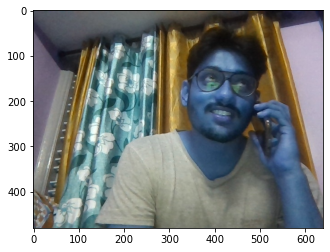

In [2]:
Imageread=cv2.imread("Happy780.jpg")

F_Emotion=Emotion_face(Imageread)
print("\nEmotion = ",F_Emotion,"\n")
plt.imshow(Imageread)
print("Input  Image")